In [ ]:
BY GADDAMADUGU SARANYA
The Sparks Foundation
DataScience & Business Analytics Intern
GRIP MARCH 23
Task-1:Prediction using Supervised MachineLearning
For this we have to apply Linear Regression for predicting student percentage based on the number of study hours


In [2]:
pip install seaborn

     -------------------------------------- 293.3/293.3 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [5]:
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
columns = list(df.columns)

In [9]:
X = df["Hours"].values.reshape(-1,1)
Y = df["Scores"].values.reshape(-1,1)

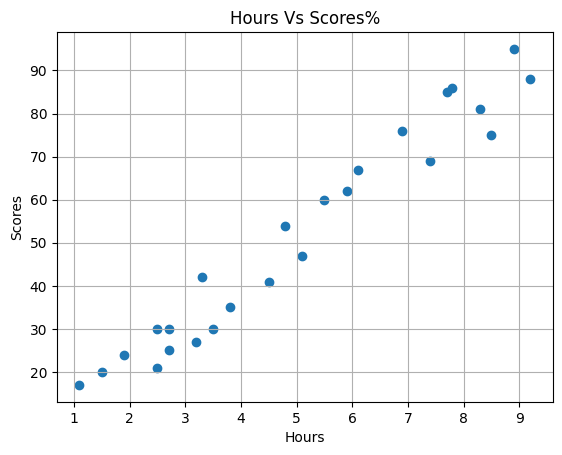

In [10]:
plt.scatter( X , Y , color = "#1f77b4" )
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Vs Scores%")
plt.grid()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()
lr

LinearRegression()

In [15]:
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
line = lr.coef_ * X + lr.intercept_

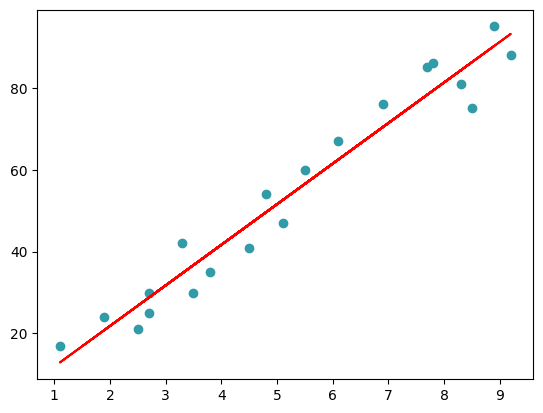

In [17]:
plt.scatter(x_train , y_train , color = "#329ba8")
plt.plot(X , line , color = "r")
plt.show()

In [18]:
Y_pred = lr.predict(x_test)
Y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

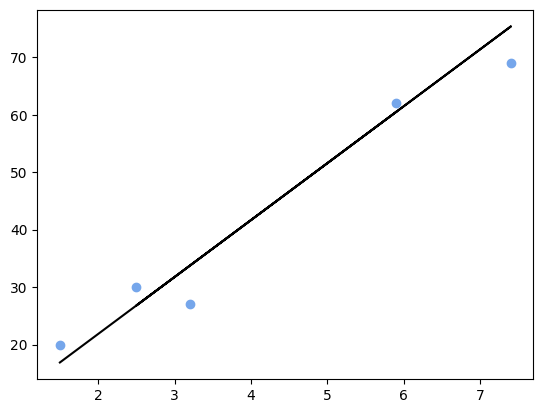

In [19]:
plt.scatter(x_test,y_test , color = "#75a6eb")
plt.plot(x_test,Y_pred , color = "black")
plt.show()

In [20]:
df_predict = pd.DataFrame({"Hours": x_test.reshape(1,-1)[0] , "Actual Score" : y_test.reshape(1,-1)[0] , "Predicted Score" : Y_pred.reshape(1,-1)[0]})
df_predict

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [21]:
df_sorted = df_predict.sort_values(by = "Hours")
df_sorted

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
3,2.5,30,26.794801
1,3.2,27,33.732261
4,5.9,62,60.491033
2,7.4,69,75.357018


C:\Users\Saranya Gaddamadugu\AppData\Local\Temp\ipykernel_6972\1582711396.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df_sorted["Actual Score"], hist = False , color = "red" , label = "Actual Score")
C:\Users\Saranya Gaddamadugu\AppData\Local\Temp\ipykernel_6972\1582711396.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github

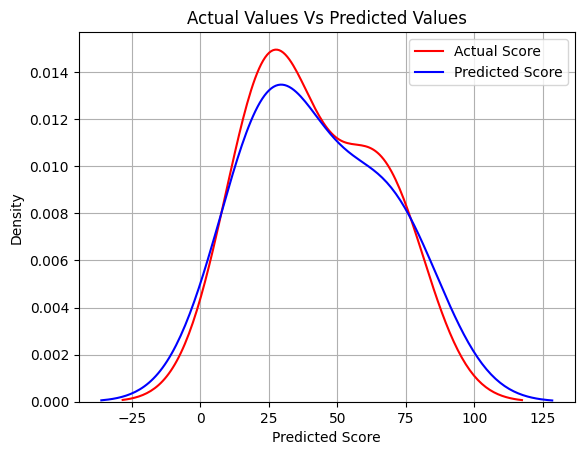

In [22]:
title = "Actual Values Vs Predicted Values"
ax1 = sns.distplot(df_sorted["Actual Score"], hist = False , color = "red" , label = "Actual Score")
sns.distplot(df_sorted["Predicted Score"] , hist = False , color = "blue" , label = "Predicted Score" , ax = ax1)
plt.legend()
plt.grid()
plt.title(title)
plt.show()

In [23]:
from sklearn.metrics import r2_score
from sklearn import metrics

mean_absolute_error=metrics.mean_absolute_error(y_test,Y_pred)
print('Mean absolute error:',mean_absolute_error)

corr=r2_score(y_train,lr.predict(x_train))
print('correlation:',corr)

acc=r2_score(y_test,Y_pred)
print('Accuracy:',acc)

Mean absolute error: 4.183859899002975
correlation: 0.9515510725211552
Accuracy: 0.9454906892105355


In [24]:
hrs = 9.25
pred = lr.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hrs/ day is",pred[0])

The predicted score if a student studies for 9.25 hrs/ day is [93.69173249]
